# Project 1: Advertising Budget vs Sales Prediction using Linear Regression

## Objective
- To analyze how advertising budget across TV, Radio, and Newspaper channels influences Sales.
- To build a Linear Regression model that predicts Sales based on advertisement spending.
- To interpret coefficients and extract business insights (which ad medium gives best ROI?).
- To evaluate model performance using RMSE, MAE, and R².

## Problem Type:
- **Regression** (Continuous target variable — Sales)

## 🔧 Evaluation Metrics to Use:
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² Score (Coefficient of Determination)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# L
# df = pd.read_csv('/content/drive/MyDrive/QIP_IIIT_A/Learning/Model Projects/Linear Regression/Advertising Budget and Sales/Advertising Budget and Sales.csv')
# df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
TV Ad Budget ($),float64
Radio Ad Budget ($),float64
Newspaper Ad Budget ($),float64
Sales ($),float64


# 🔍 Exploratory Data Analysis


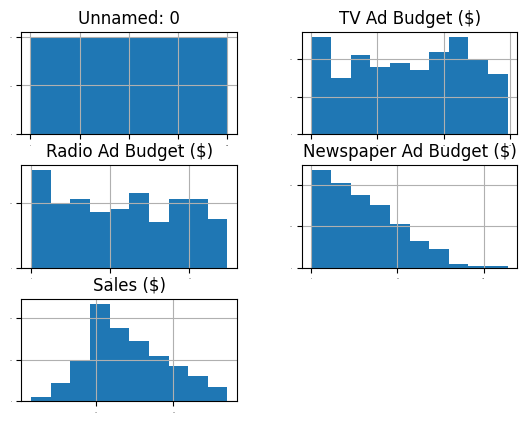

In [ ]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

/tmp/ipython-input-3480165815.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df, ax=fig.gca())


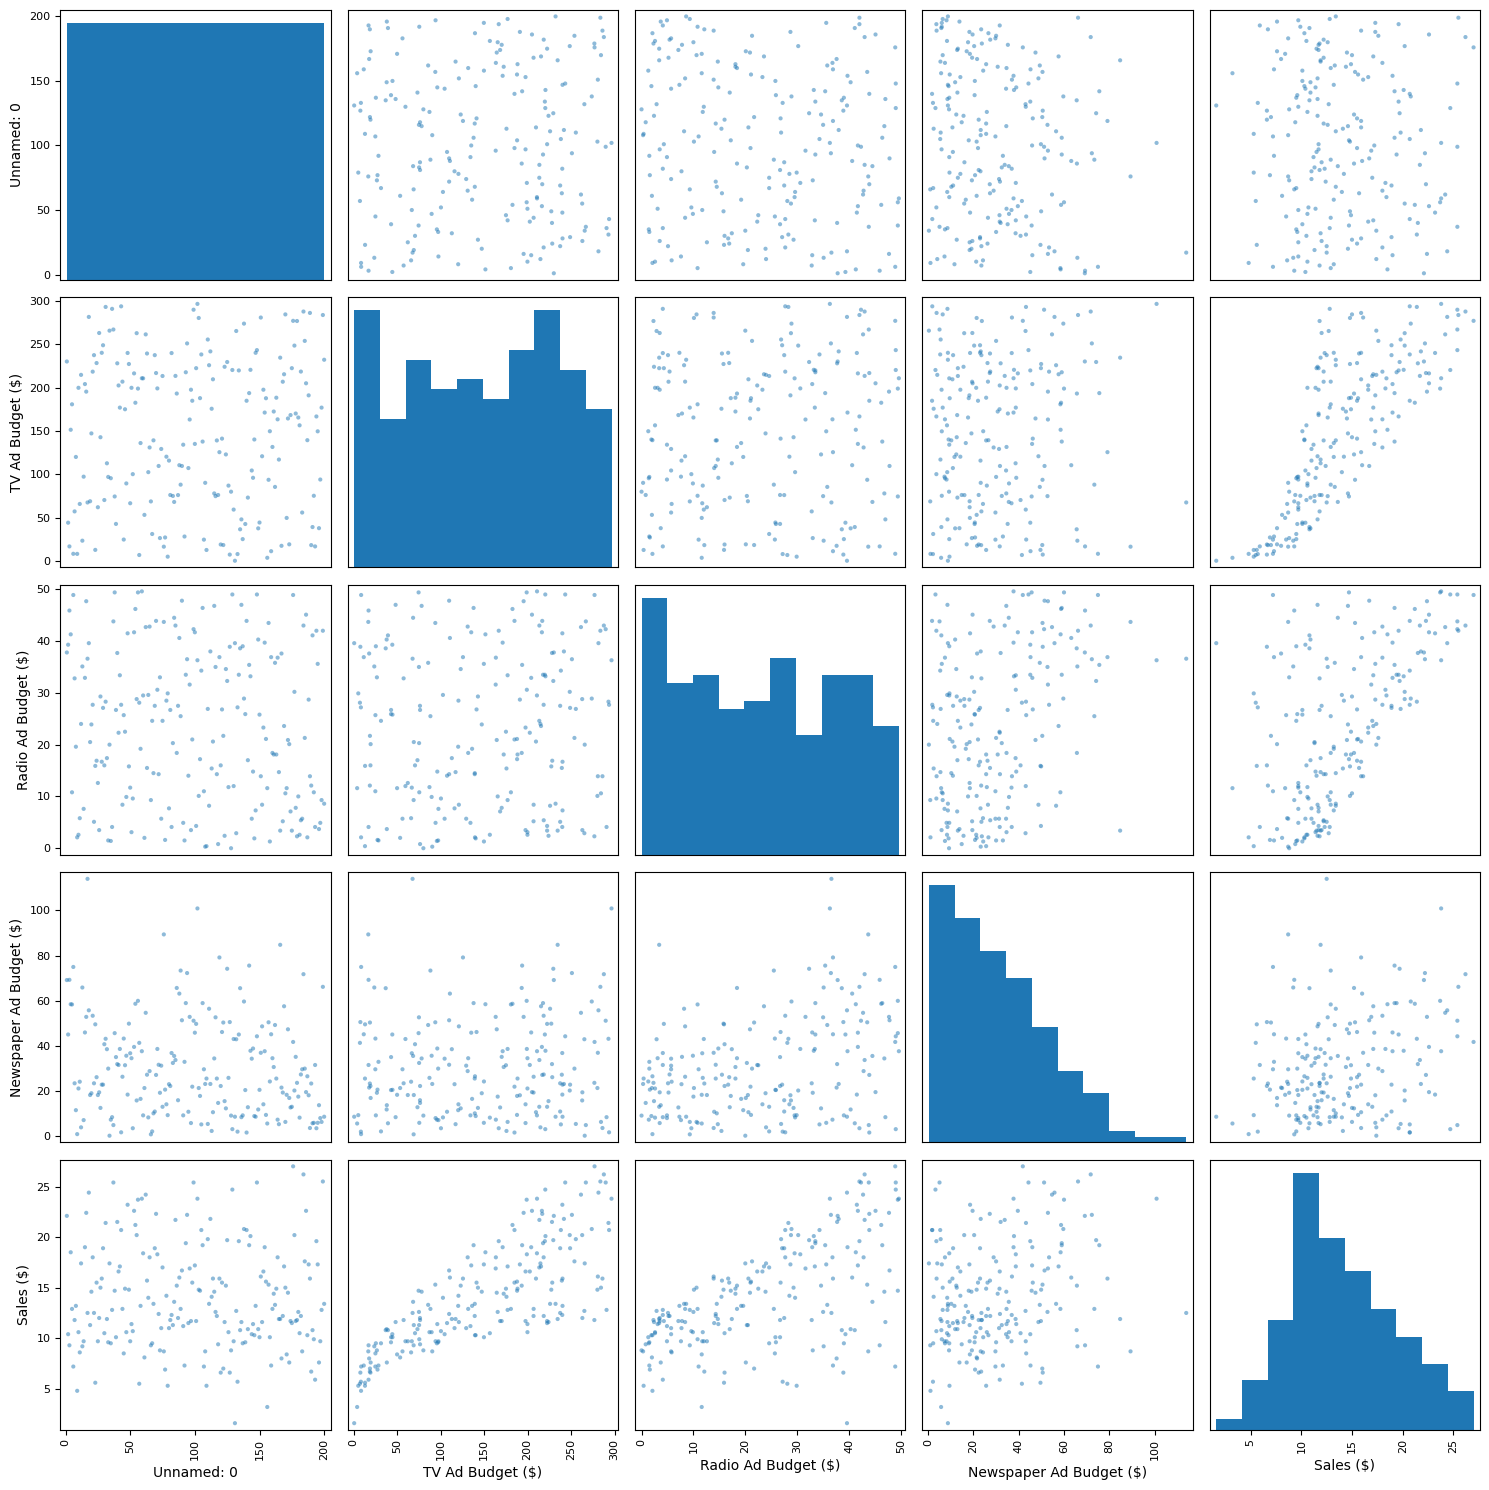

In [ ]:
fig = plt.figure(figsize=(15, 15))

scatter_matrix(df, ax=fig.gca())

for ax in fig.get_axes():
    ax.tick_params(axis='x', labelsize=8) # Smaller font for x-axis ticks
    ax.tick_params(axis='y', labelsize=8) # Smaller font for y-axis ticks
    ax.xaxis.label.set_size(10) # Adjust x-axis label size
    ax.yaxis.label.set_size(10) # Adjust y-axis label size

plt.tight_layout()
plt.show()

<Axes: >

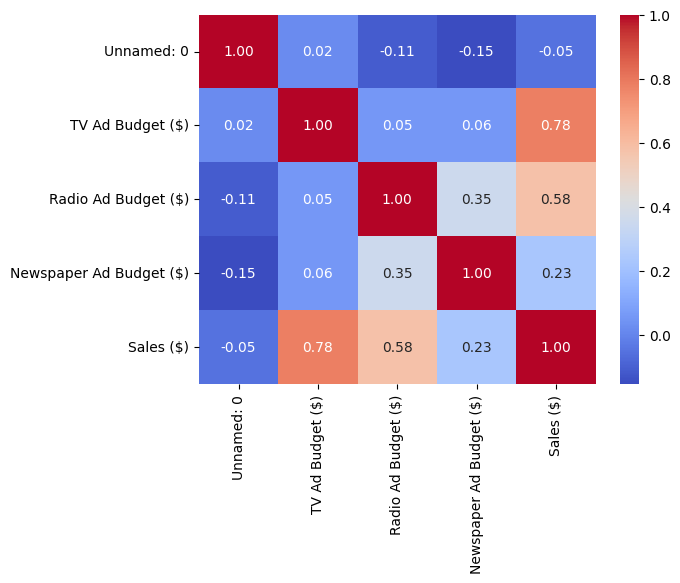

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# **Implementation**

In [ ]:
X = df.drop('Sales ($)', axis=1)
X = X.drop('Unnamed: 0', axis=1)
Y = df['Sales ($)']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_

array([ 0.04629706,  0.18884254, -0.00107495])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from math import sqrt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error = {mae:.3f}")
print(f"Root Mean Squared Error = {rmse:.3f}")
print(f"R² = {r2:.3f}")

Mean Absolute Error = 1.144
Root Mean Squared Error = 1.559
R² = 0.910


**Drop Newspaper Ad Budget ($)**

In [ ]:
X = df.drop('Sales ($)', axis=1)
X = X.drop('Unnamed: 0', axis=1)
X = X.drop('Newspaper Ad Budget ($)', axis=1)
Y = df['Sales ($)']
X

,TV Ad Budget ($),Radio Ad Budget ($)
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([0.0462886 , 0.18833637]), np.float64(2.8299176529903))

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from math import sqrt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error = {mae:.3f}")
print(f"Root Mean Squared Error = {rmse:.3f}")
print(f"R² = {r2:.3f}")

Mean Absolute Error = 1.146
Root Mean Squared Error = 1.559
R² = 0.910


# **Visualization**

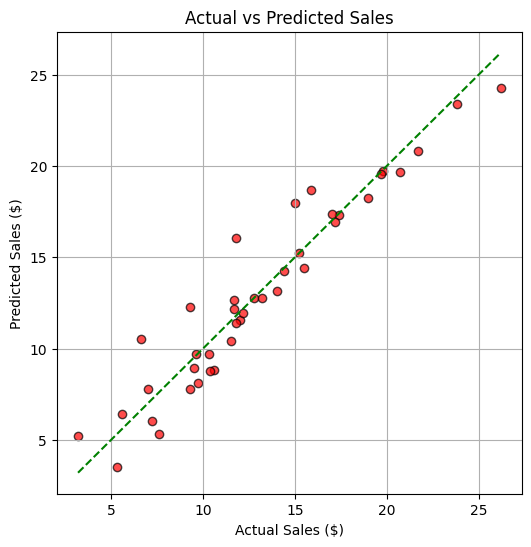

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='red', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales ($)")
plt.ylabel("Predicted Sales ($)")
plt.grid(True)
plt.show()

In [ ]:
residual = []
for value in zip(np.array(y_test), y_pred):
  residual.append(value[0] - value[1])
residual = np.array(residual)
residual

array([ 0.45901186,  1.08208814, -0.83547544,  0.11184651,  2.30501316,
       -2.97072086, -0.78704255,  1.06197727,  0.57891673,  0.84148638,
        1.7883671 , -0.93572286, -0.09823948,  1.52464054, -2.78633356,
       -2.00440278,  1.61326417,  0.25823675,  0.76389092,  1.75346464,
       -4.2711477 ,  1.04335318,  1.6547772 , -0.34098012,  0.61731588,
       -2.98613293,  0.41353035,  0.02547143,  0.08172491, -0.47726152,
        0.4495164 ,  1.14116724,  0.17641012,  0.88900187,  0.16358335,
       -0.03826487, -3.91725342,  1.9590164 ,  0.4050521 ,  0.23349879])

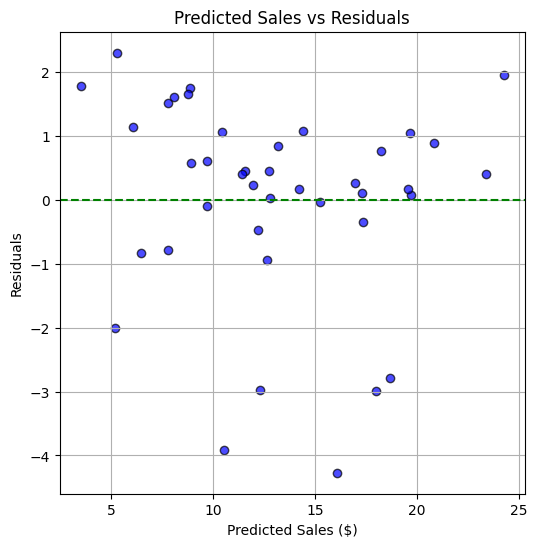

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred, residual, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel("Predicted Sales ($)")
plt.ylabel("Residuals")
plt.title("Predicted Sales vs Residuals")
plt.grid(True)
plt.show()

# **Variance Infiltration Factor**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF

[np.float64(2.238084900165853), np.float64(2.238084900165853)]

In [ ]:
X.shape

(200, 2)

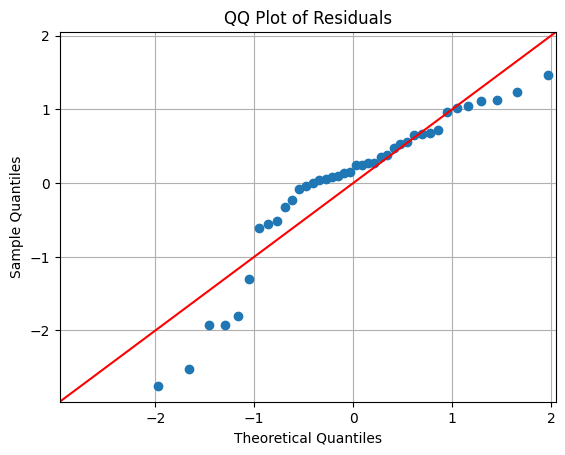

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your residuals are stored in a variable called 'residuals'
sm.qqplot(residual, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.grid(True)
plt.show()
